# Jacob Pan, Jacobfp2, CHBE 494 HW 5

## Question 1

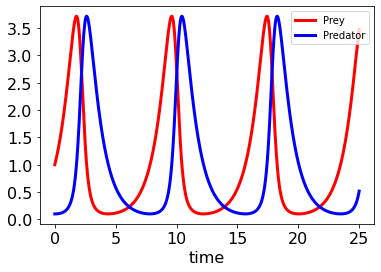

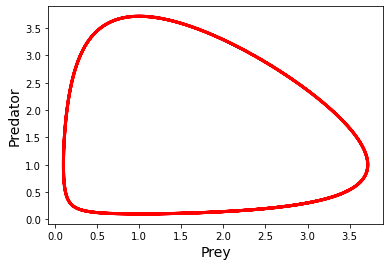

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


def lokta(z, t):
    alpha = 1
    beta = 1
    delta = 1
    gamma = 1
    x, y = z
    return [alpha* x - beta* x* y, delta* x* y - gamma* y]

#define time range
t = np.linspace(0,25,1000)

#define initial condition
x0 = [1, 0.1]

z = odeint(lokta, x0, t) 
x = z[:,0]
y = z[:,1]

plt.plot(t,x,lw=3,color='r', label = "Prey")
plt.plot(t,y,lw=3,color='b', label = "Predator")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('time',fontsize=16)
plt.legend(loc = "upper right")
plt.show()

plt.plot(x,y, lw = 3, color = 'r')
plt.xlabel("Prey", fontsize = "14")
plt.ylabel("Predator", fontsize = "14")
plt.show()


## Question 2

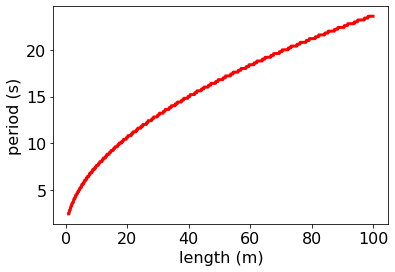

In [2]:
def pendulum(l, z, t):
    g = 9.8
    x1, x2 = z
    dx1 = x2 
    dx2 = -(g/l) *np.sin(x1)
    return [dx1, dx2]

#Blank list to take in period values
array = []

#timespan
l = np.linspace(1,100,1000)
t = np.linspace(0,100,1000)

#initial condition
x0 = np.pi/2
x1 = 0
z0 = [x0, x1]

def getLength(l):
    length = odeint(lambda z,t: pendulum(l,z,t), z0, t)
    return length[:,0]
    
def getPeriod(period):
    i=0
    while(True):
        if period[i] >= 0 and period[i+1] < 0:
            t1 = t[i]
            break
        i = i+1
    while(True):
        if period[i] < 0 and period[i+1] >= 0:
            t2 = t[i]
            break
        i = i+1
    return 2*(t2-t1)

for value in l:
    number = getPeriod(getLength(value))
    array.append(number)

plt.plot(l,array,lw=3,color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('length (m)',fontsize=16)
plt.ylabel('period (s)',fontsize=16)
plt.show()

## Question 3

440


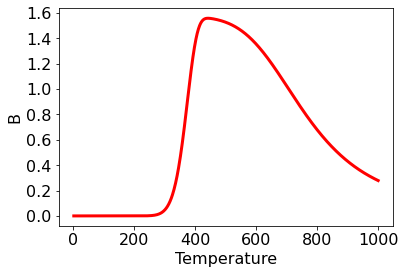

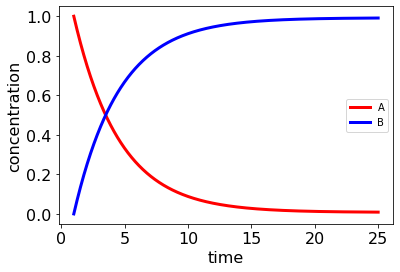

In [3]:
def batch(z,t,T):
    R = 8.314
    A,B = z
    r1 = 25200*np.exp(-41868/(R*T))
    r2 = (1.8E7)*np.exp(-83737/(R*T))
    dA = -r1*A + r2*B
    dB = r1*A - r2*B
    return [dA, dB]

t = np.linspace(1,25,1000)
T = np.linspace(1,1000,1000)

arrayB = []
for i in range(len(T)):
    z = odeint(batch,z0,t, args = (T[i],))
    B = z[len(z) - 1, 1]
    arrayB.append(B)


A0 = 1
B0 = 0
z0 = [A0,B0]
print(arrayB.index(max(arrayB)))
z2 = odeint(batch,z0,t, args = (T[arrayB.index(max(arrayB))],))
A = z2[:,0]
B = z2[:,1]

#Plot one
plt.plot(T,arrayB,lw=3,color='r')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Temperature',fontsize=16)
plt.ylabel('B',fontsize=16)
plt.show()


#Plot two
plt.plot(t,A,lw=3,color='r', label = 'A')
plt.plot(t,B,lw=3,color='b', label = 'B')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('time',fontsize=16)
plt.ylabel('concentration',fontsize=16)
plt.legend(loc = 'right' )
plt.show()

## Question 4

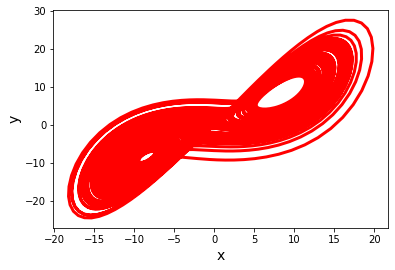

In [4]:
def lorenz(w, t):
    x, y, z = w
    sigma = 10
    b = 8/3
    r = 28
    return [sigma* (y-x), r*x - y - x*z, x*y - b*z]

#define time range
t = np.linspace(0, 100, 10000)

#define initial condition
x0 = [1, 0, 0]

w = odeint(lorenz, x0, t) 
x = w[:,0]
y = w[:,1]
z = w[:,2]


plt.plot(x,y, lw = 3, color = 'r')
plt.xlabel("x", fontsize = "14")
plt.ylabel("y", fontsize = "14")
plt.show()
